# Exploratory Data Analysis on Smart City Citizen Activities

## Introduction
&nbsp;&nbsp;&nbsp;This exploratory data analysis project explores the "Futuristic Smart City Citizen Activity Dataset" from [Kaggle](https://www.kaggle.com/datasets/atharvasoundankar/futuristic-smart-city-citizen-activity-dataset/discussion?sort=hotness).

&nbsp;&nbsp;&nbsp;The EDA will focus on the behavior of the city's population based on their age group (Boomer, Gen X, Millennial, or Gen Z) and how should the local governement and businesses market and/or formulate effective programs based on the population's behavior. 
    
&nbsp;&nbsp;&nbsp;This EDA will be done through Python for analysis and visualizations and Tableau for dashboard creation.

## Data Processing
&nbsp;&nbsp;&nbsp;The data CSV file is directly loaded into a Python data frame and then quickly analysed through its .info() and .describe() output.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

ds_path = "C:/Users/junos/Python/Smart City Activities EDA/Dataset/smart_city_citizen_activity.csv"
df = pd.read_csv(ds_path)

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Citizen_ID                   1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   Gender                       1000 non-null   object 
 3   Mode_of_Transport            1000 non-null   object 
 4   Work_Hours                   1000 non-null   int64  
 5   Shopping_Hours               1000 non-null   int64  
 6   Entertainment_Hours          1000 non-null   int64  
 7   Home_Energy_Consumption_kWh  1000 non-null   float64
 8   Charging_Station_Usage       1000 non-null   int64  
 9   Carbon_Footprint_kgCO2       1000 non-null   float64
 10  Steps_Walked                 1000 non-null   int64  
 11  Calories_Burned              1000 non-null   int64  
 12  Sleep_Hours                  1000 non-null   float64
 13  Social_Media_Hours 

&nbsp;&nbsp;&nbsp;Based on the output, the data frame has a total of 1000 rows with 15 columns. Each column has no null rows. 

## Analysis

&nbsp;&nbsp;&nbsp;To start off, a correlation heat map is generated in order to identify any bivariate correlation within the numerical columns.

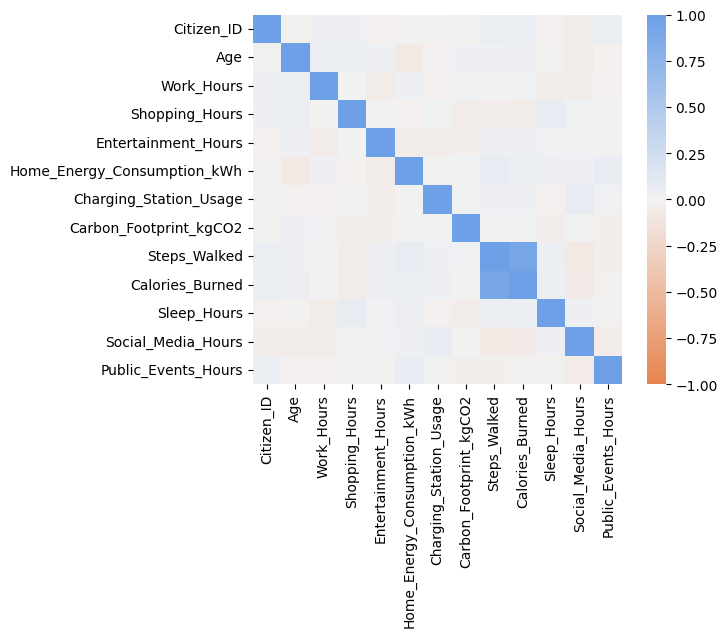

In [2]:
#Correlation Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr(numeric_only=True)

axis_corr = sns.heatmap(
df_corr,
vmin=-1, vmax=1, center=0,
cmap= sns.diverging_palette(30, 250, l=65, as_cmap=True),
square=True
)

plt.show() 

&nbsp;&nbsp;&nbsp;Aside from the positive linear relationship between calories burned and steps walked, no other obvious relationship can be deduced from the correlation heat map.

&nbsp;&nbsp;&nbsp;Before diving into the data, it will be first segmented based on age. Population segmentation by age group is done by categorizing the citizens based on their generation. The age range for each generation category is based on the definition of [Pew Research Center](https://www.pewresearch.org/short-reads/2019/01/17/where-millennials-end-and-generation-z-begins/) adjusted for the year 2025. Also, based on the statistical summary earlier, age range of the population is from 18 to 69 years old. Thus, only 4 generations will be considered for this EDA.

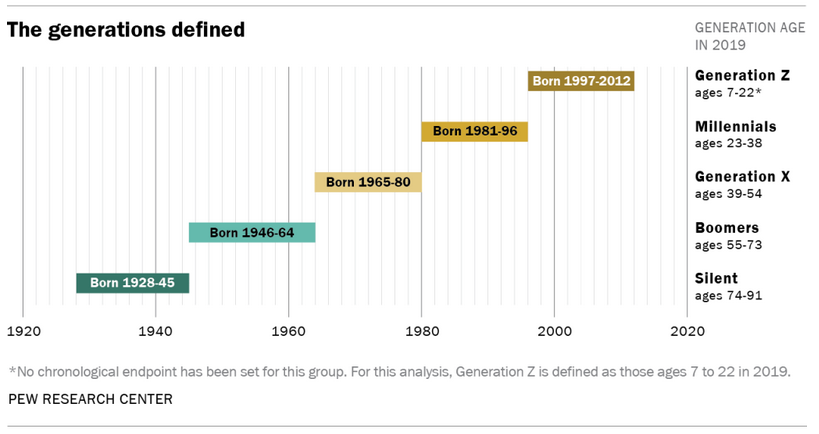

In [2]:
#Binning by age
df['age_group'] = pd.cut(df['Age'], [13, 28, 44, 60, 79], labels=['Gen Z', 'Millennial', 'Gen X', 'Boomer'])

df[['age_group', 'Age']].head(5)

,age_group,Age
0,Gen X,56
1,Boomer,69
2,Gen X,46
3,Millennial,32
4,Gen X,60


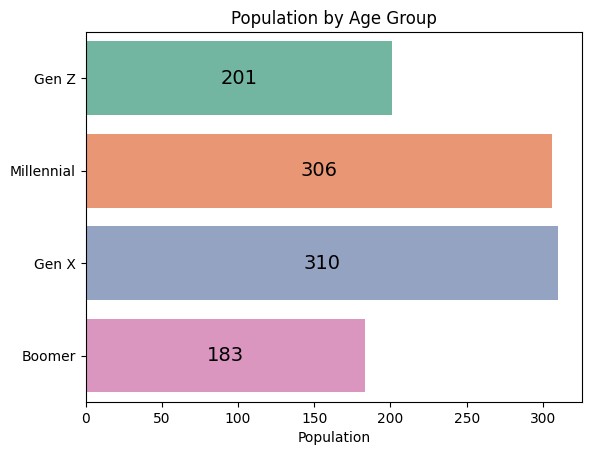

In [4]:
#Visualize age group distribution

df_age_group = df['age_group'].value_counts().reset_index()
df_age_group.columns = ['age_group', 'count']

ax = sns.barplot(data=df_age_group, x='count', y='age_group', hue='age_group', palette='Set2', orient='h')

plt.ylabel(None)
plt.xlabel('Population')
plt.title('Population by Age Group')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    value = width 
    if value > 0:
        ax.annotate(f'{value:.0f}', (x + width/2, y + height/2), 
                    ha='center', va='center', fontsize=14)    
        

plt.show()

&nbsp;&nbsp;&nbsp;Through the barplot, it is identified that majority of the population belongs to Generation X or 45 to 60 year old citizens accounting to 31% of the total population followed closely by Millennials or 29 to 44 year old citizens accounting for 30.6% of the population.  

&nbsp;&nbsp;&nbsp;Next is investigate the correlation between steps walked and calories burned.

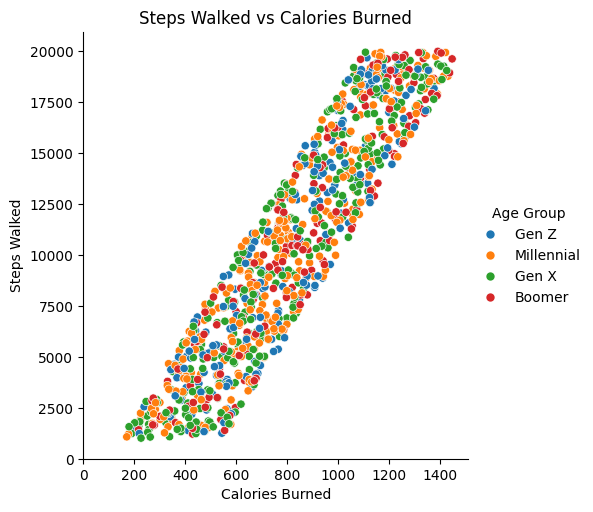

In [5]:
#Steps walked vs calories burned
ax = sns.relplot(data=df, x='Calories_Burned', y='Steps_Walked', hue='age_group')
ax.set(xlabel='Calories Burned', ylabel='Steps Walked', title='Steps Walked vs Calories Burned', xticks=np.arange(0,1600, 200), yticks=np.arange(0,22500, 2500))
ax.legend.set_title("Age Group")

plt.show()

&nbsp;&nbsp;&nbsp;As expected, steps walked and calories burned have a strong positive correlation (steps walked increases as calories burned increases). No obvious trend is present for the age groups.

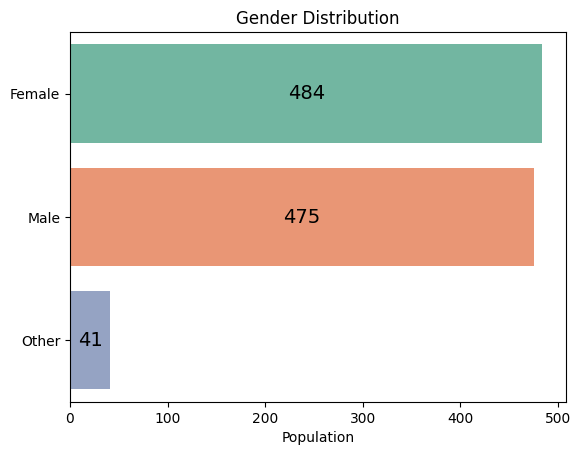

In [14]:
df_gender = df.value_counts('Gender').reset_index()

ax = sns.barplot(data=df_gender, x='count', y='Gender', orient='h', hue='Gender', palette='Set2')

plt.xlabel('Population')
plt.ylabel(None)
plt.title('Gender Distribution')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    value = width 
    if value > 0:
        ax.annotate(f'{value:.0f}', (x + width/2, y + height/2), 
                    ha='center', va='center', fontsize=14)    

plt.show()

&nbsp;&nbsp;&nbsp; The demographic has a roughly equal distribution of male and female citizens with very few people identifying as 'Other'.

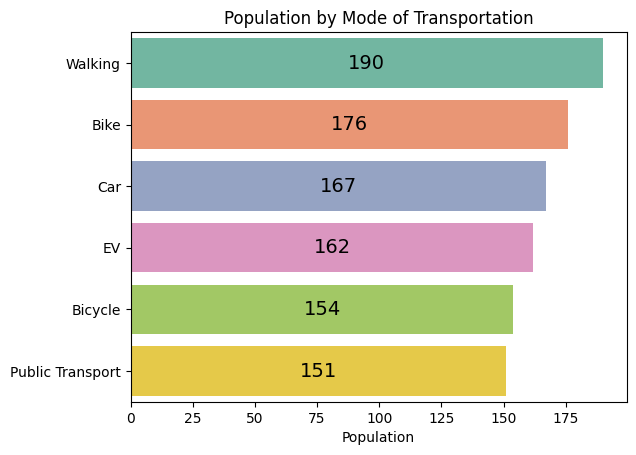

In [6]:
#Preference for mode of transportation
df_mot = df.value_counts('Mode_of_Transport').reset_index()

ax = sns.barplot(data=df_mot, x='count', y='Mode_of_Transport', orient='h', hue='Mode_of_Transport', palette='Set2')

plt.xlabel('Population')
plt.ylabel(None)
plt.title('Population by Mode of Transportation')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    value = width 
    if value > 0:
        ax.annotate(f'{value:.0f}', (x + width/2, y + height/2), 
                    ha='center', va='center', fontsize=14)    

plt.show()

&nbsp;&nbsp;&nbsp;Walking is the preferred mode of transportation of the citizens but preference among all options are relatively equal. It is worth noting the city's high EV adoption, around 49& of car owners are using EVs. Assuming that 'Bike' refers to motorcycles, a new category (Private Vehicle) in a new column (transport_category) will be made to further summarize the data.

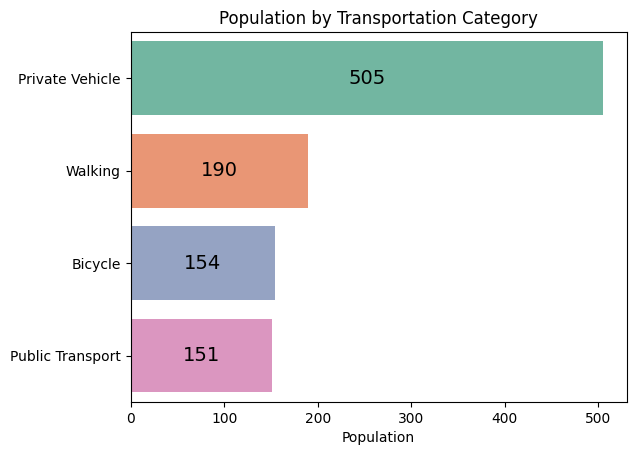

In [7]:
#Summarize transportation preference
df['transport_category'] = np.where(df['Mode_of_Transport'].isin(['EV', 'Car', 'Bike']), 'Private Vehicle', df['Mode_of_Transport'])

df_tc = df.value_counts('transport_category').reset_index()

ax = sns.barplot(data=df_tc, x='count', y='transport_category', orient='h', hue='transport_category', palette='Set2')

plt.xlabel('Population')
plt.ylabel(None)
plt.title('Population by Transportation Category')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    value = width 
    if value > 0:
        ax.annotate(f'{value:.0f}', (x + width/2, y + height/2), 
                    ha='center', va='center', fontsize=14)    

plt.show()

&nbsp;&nbsp;&nbsp; Majority of the population or 50.5% are on private vehicle. This could indicate that the public transportation sector needs to improve its services or the city's urban planning needs to be reviewed as it could imply that residential, commercial, and industrial districts are too far apart.

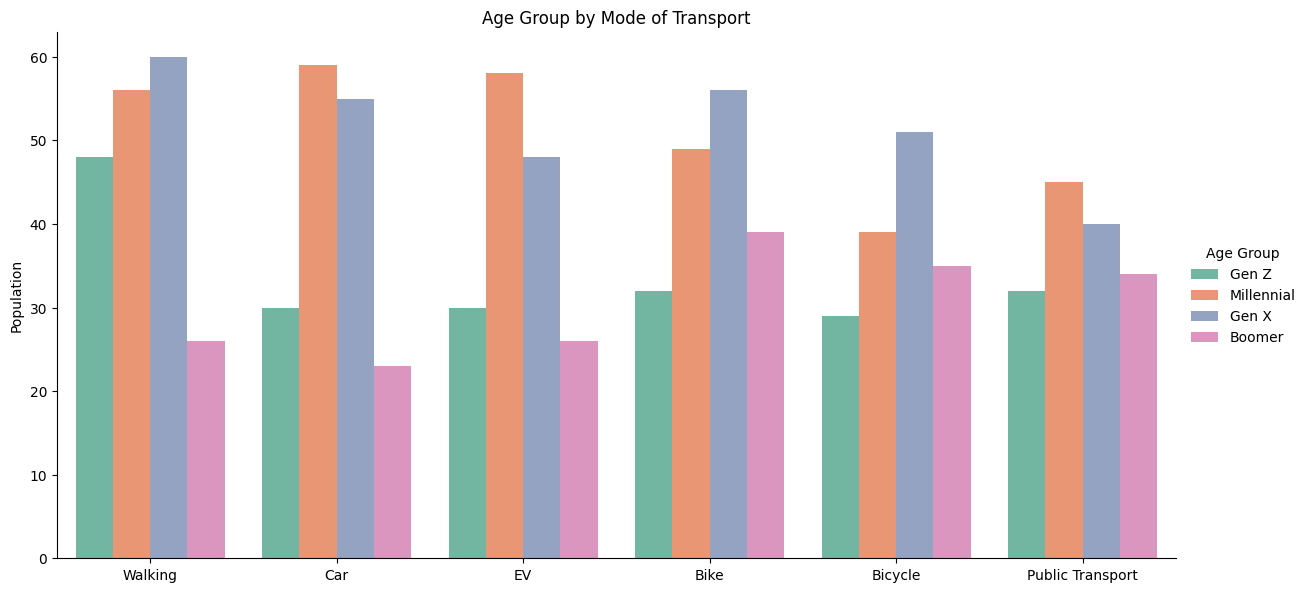

In [8]:
df_mot_ag = df.value_counts(['age_group', 'Mode_of_Transport']).reset_index()

ax = sns.catplot(data=df_mot_ag, x='Mode_of_Transport', y='count', kind='bar', hue='age_group', palette='Set2', height=6, aspect=2)
ax.set(xlabel=None, ylabel='Population', title="Age Group by Mode of Transport")
ax.legend.set_title("Age Group")

plt.show()

&nbsp;&nbsp;&nbsp;Millennials and Gen X generally dominates all categories.

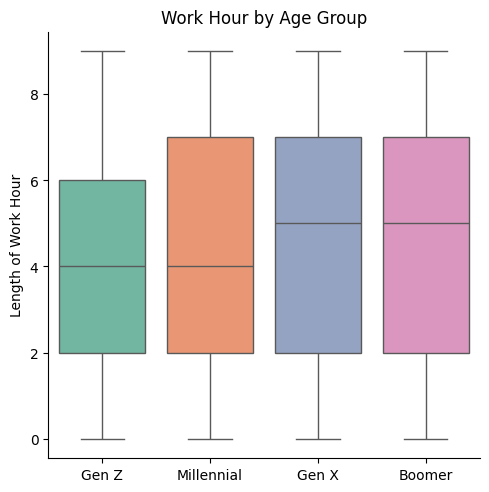

In [11]:
#Boxplot for work hour by age group

ax = sns.catplot(data=df, x='age_group', y='Work_Hours', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel='Length of Work Hour', title='Work Hour by Age Group')

plt.show()

&nbsp;&nbsp;&nbsp;Gen Zs have the shortest work hour where 75% of the population are working 6 hours or less. It is also interesting to see that the median for Gen Zs and Millennials are equal at 4 hours.  

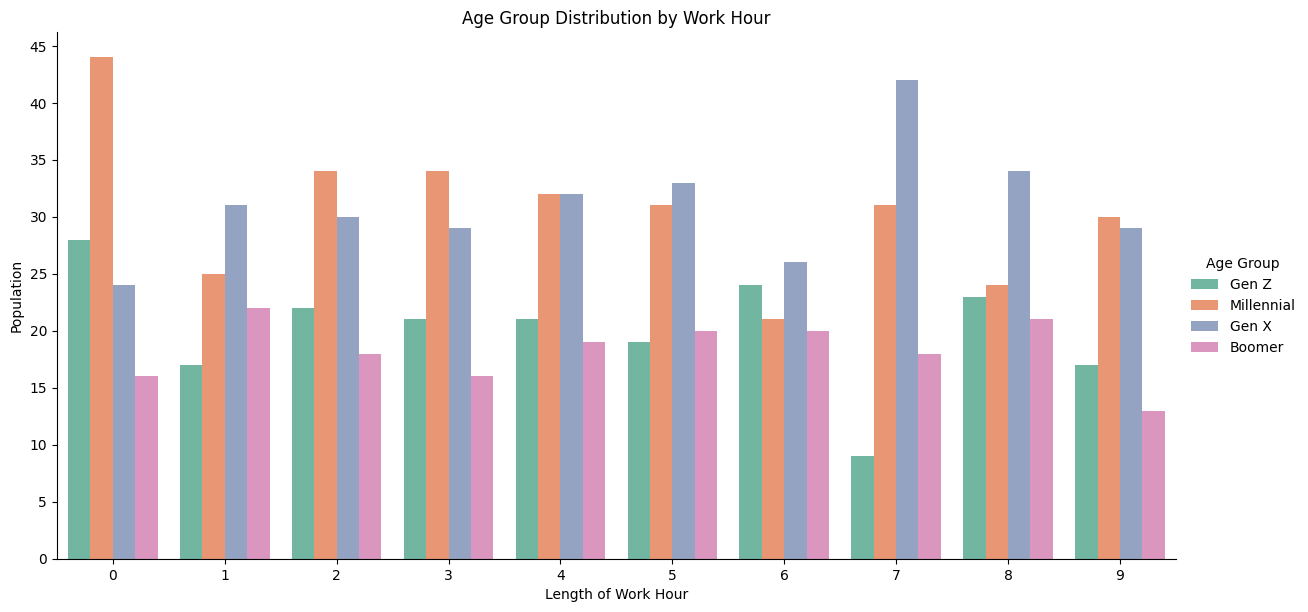

In [10]:
#Distribution of age group by work hour
df_wh = df.value_counts(['age_group', 'Work_Hours']).reset_index()

ax = sns.catplot(data=df_wh, x='Work_Hours', y='count', kind='bar', hue='age_group', palette='Set2', height=6, aspect=2,  )
ax.set(xlabel='Length of Work Hour', ylabel='Population', title='Age Group Distribution by Work Hour', yticks=np.arange(0,50,5))
ax.legend.set_title("Age Group")

plt.show()

&nbsp;&nbsp;&nbsp;The equal median of Gen Zs and Millennials could be due to the fact that a significant amount of Millennials are not working. While Gen Zs may have a good amount of non-working individuals, it may be partly due to the fact that a portion of them are students. However, most millennials are in the typical working age. Further study should be conducted to understand this phenomenon.

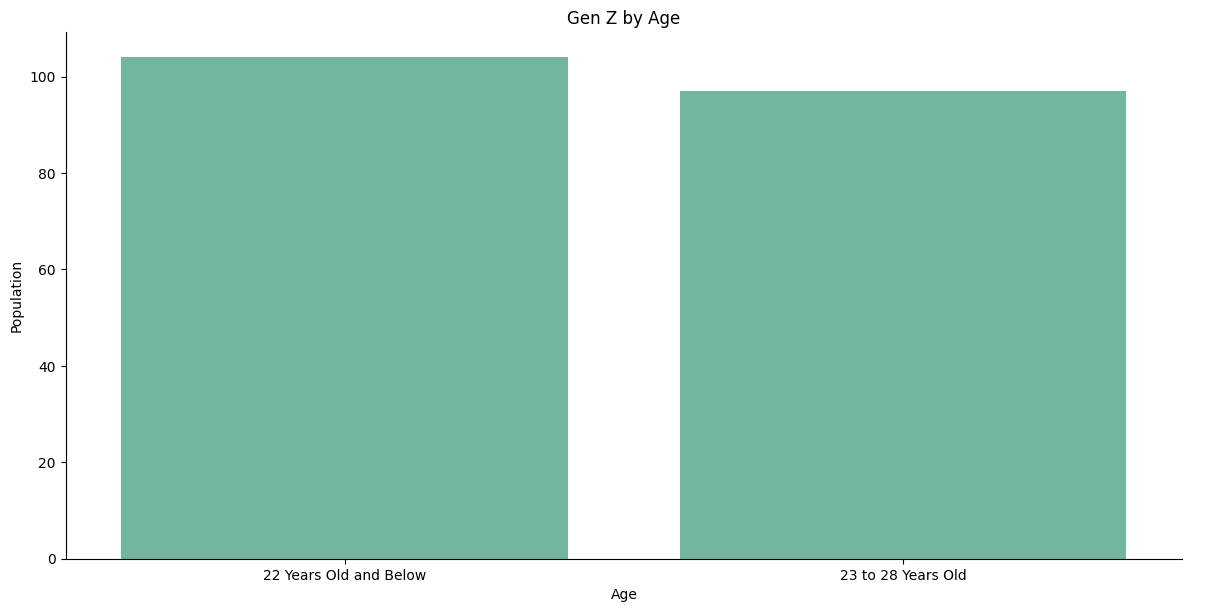

In [11]:
#Gen Z by age
df_genz = df[df['age_group'] == 'Gen Z'].copy()
df_genz['age_bin'] = pd.cut(df_genz['Age'], [13, 22, 28], labels=['22 Years Old and Below', '23 to 28 Years Old'])
df_genz = df_genz.value_counts(['age_bin']).reset_index()

ax = sns.catplot(data=df_genz, x='age_bin', y='count', kind='bar', height=6, aspect=2, color='#66c2a5')
ax.set(xlabel='Age', ylabel='Population', title='Gen Z by Age')

plt.show()

&nbsp;&nbsp;&nbsp;Plot confirming that more than half of Gen Z are below 22 years old, the typical college graduate age.

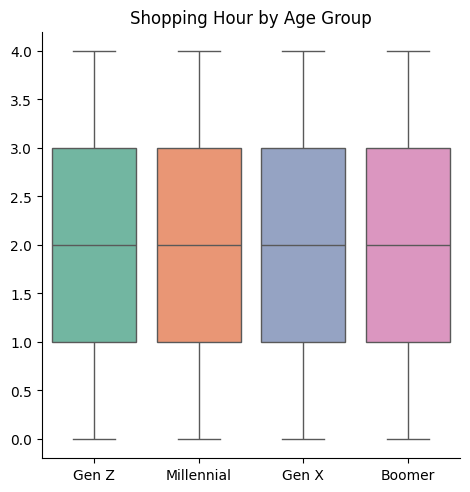

In [12]:
#Shopping hour bu age group
ax = sns.catplot(data=df, x='age_group', y='Shopping_Hours', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel=None, title='Shopping Hour by Age Group')

plt.show()

&nbsp;&nbsp;&nbsp;All age group have a similar shopping time allotment, however, Millennials and Gen Xs are still the majority population and thus is the bigger market for businesses.

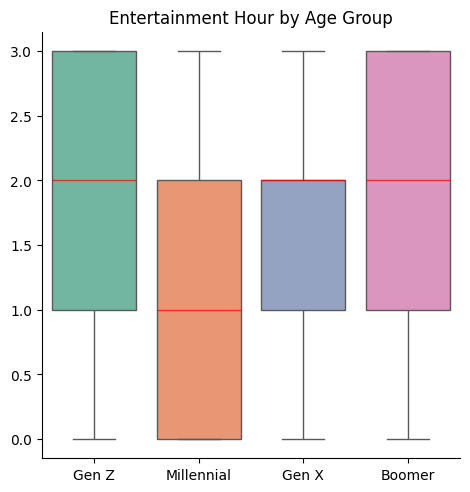

In [13]:
#Entertainment hours by age group
ax = sns.catplot(data=df, x='age_group', y='Entertainment_Hours', hue='age_group', palette='Set2', kind='box', medianprops=dict(color="red", alpha=0.7))
ax.set(xlabel=None, ylabel=None, title='Entertainment Hour by Age Group')

plt.show()

&nbsp;&nbsp;&nbsp;Gen Zs and Boomers have the highest viewing hours at 3 hours, this is a challenging scenario with businesses as these 2 markets have different characteristics due to the large generational gap. It is possible that each market are interested in different sectors of the entertainment industry, thus each sector can focus on their audience. It is interesting to see that a 50% of Millennials spend less than an hour for entertainment, this could mean a lack of option for this age group or simply their behaviour.

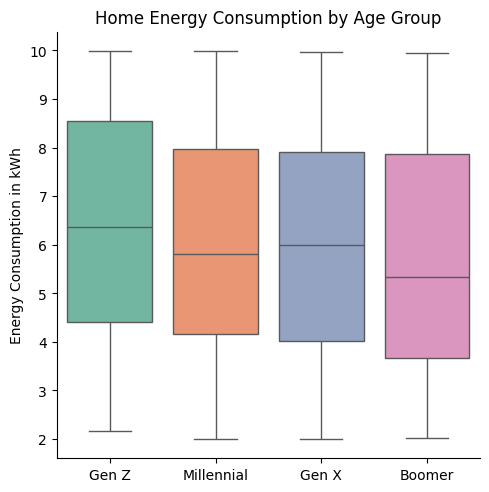

In [14]:
#Energy consumption by age group
ax = sns.catplot(data=df, x='age_group', y='Home_Energy_Consumption_kWh', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel='Energy Consumption in kWh', title='Home Energy Consumption by Age Group')

plt.show()

&nbsp;&nbsp;&nbsp; Gen Zs are the most energy intensive individuals which may be due to the fact that most of them are students and thus spends more time at home than the other generations. Energy saving products could be better marketed towards them.

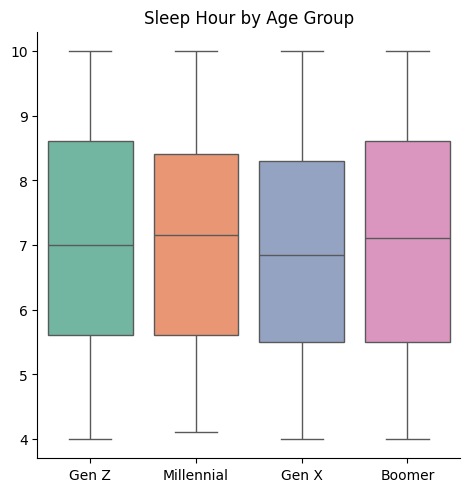

In [15]:
#Sleep hour by age group
ax = sns.catplot(data=df, x='age_group', y='Sleep_Hours', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel=None, title='Sleep Hour by Age Group')

plt.show()

&nbsp;&nbsp;&nbsp; Sleep time per age group does not differ much from each other.

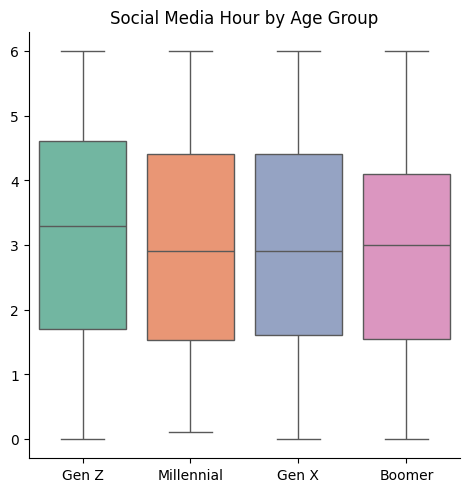

In [16]:
#Social media use by age group
ax = sns.catplot(data=df, x='age_group', y='Social_Media_Hours', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel=None, title='Social Media Hour by Age Group')

plt.show()

&nbsp;&nbsp;&nbsp; Gen Zs have slightly higher social media hours than the rest while boomers have slightly lower hours than the rest. Their differences are however, not much significant.

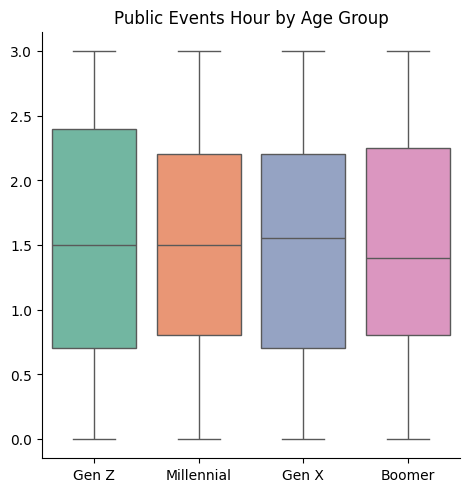

In [17]:
#Public event hours
ax = sns.catplot(data=df, x='age_group', y='Public_Events_Hours', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel=None, title='Public Events Hour by Age Group')

plt.show()

&nbsp;&nbsp;&nbsp; Gen Zs once again slighty ahead than others but the data suggest that everyone has paticipated in public events. 

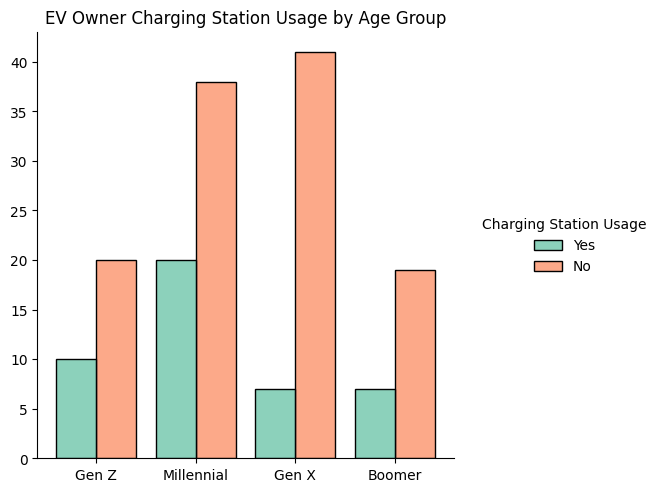

In [18]:
#Charging station usage
df['Charging_Station_Usage'] = df['Charging_Station_Usage'].replace({0: 'No', 1: 'Yes'})
df_ev = df[df['Mode_of_Transport']=='EV']

ax = sns.displot(data=df_ev, x='age_group', hue='Charging_Station_Usage', palette='Set2', discrete=True, multiple='dodge', shrink=0.8, hue_order=['Yes', 'No'])
ax.set(xlabel=None, ylabel=None, title='EV Owner Charging Station Usage by Age Group')
ax.legend.set_title("Charging Station Usage")

plt.show()

&nbsp;&nbsp;&nbsp; Gen X and Boomer EV owners have significant amount of none users compared to the other age group. 

[Text(0.5, 0, 'Charging Station Usage'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'EV Owner Charging Station Usage')]

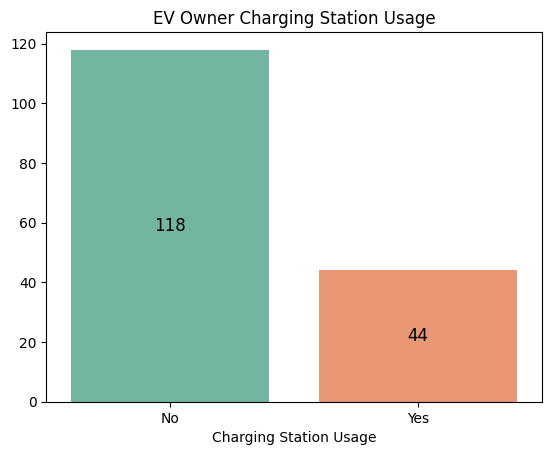

In [19]:
#EV owner charging station utilization
df_ev = df[df['Mode_of_Transport']=='EV']
df_ev = df_ev.value_counts(['Mode_of_Transport', 'Charging_Station_Usage']).reset_index()

ax = sns.barplot(data=df_ev, x='Charging_Station_Usage', y='count', hue='Charging_Station_Usage', palette='Set2')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2, p.get_height() / 2),  
        ha='center', va='center', fontsize=12, color='black')
ax.set(xlabel='Charging Station Usage', ylabel=None, title='EV Owner Charging Station Usage')

&nbsp;&nbsp;&nbsp; In general, about 72.8% of EV owners does not utilize charging stations. This could indicate lack of stations, uninformed owners, or pricing issues.

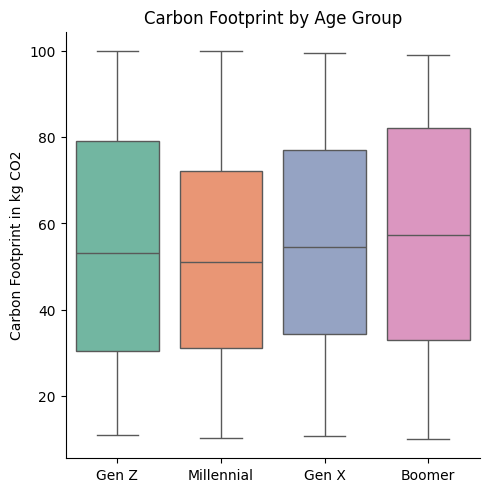

In [20]:
#Carbon footprint by age group
ax = sns.catplot(data=df, x='age_group', y='Carbon_Footprint_kgCO2', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel='Carbon Footprint in kg CO2', title='Carbon Footprint by Age Group')

plt.show()

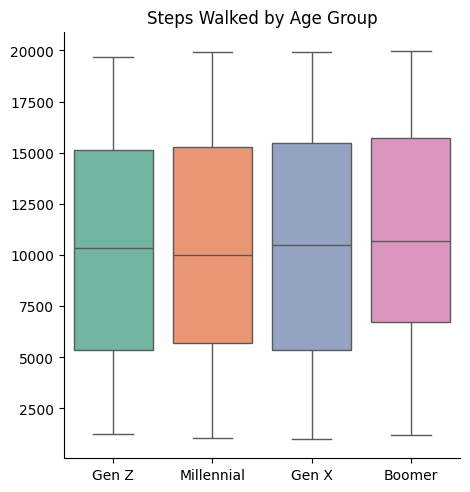

In [21]:
#Steps walked by age group 
ax = sns.catplot(data=df, x='age_group', y='Steps_Walked', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel=None, title='Steps Walked by Age Group')

plt.show()

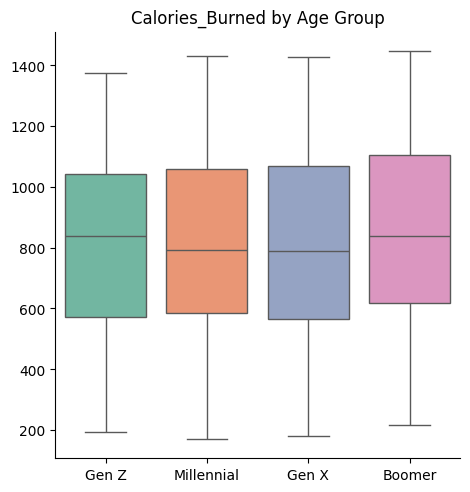

In [22]:
#Calories burned by age group
ax = sns.catplot(data=df, x='age_group', y='Calories_Burned', hue='age_group', palette='Set2', kind='box')
ax.set(xlabel=None, ylabel=None, title='Calories_Burned by Age Group')

plt.show()

&nbsp;&nbsp;&nbsp; The carbon footprint, steps walked, and calories burned are generally the same for all age group.

&nbsp;&nbsp;&nbsp; Additionally, a dashboard was created in [Tableau](https://public.tableau.com/app/profile/jun.oshima/viz/SustainableCityCitizenActivityInsights/SustainableCityCitizenActivityInsights#1) for summary and visualization.


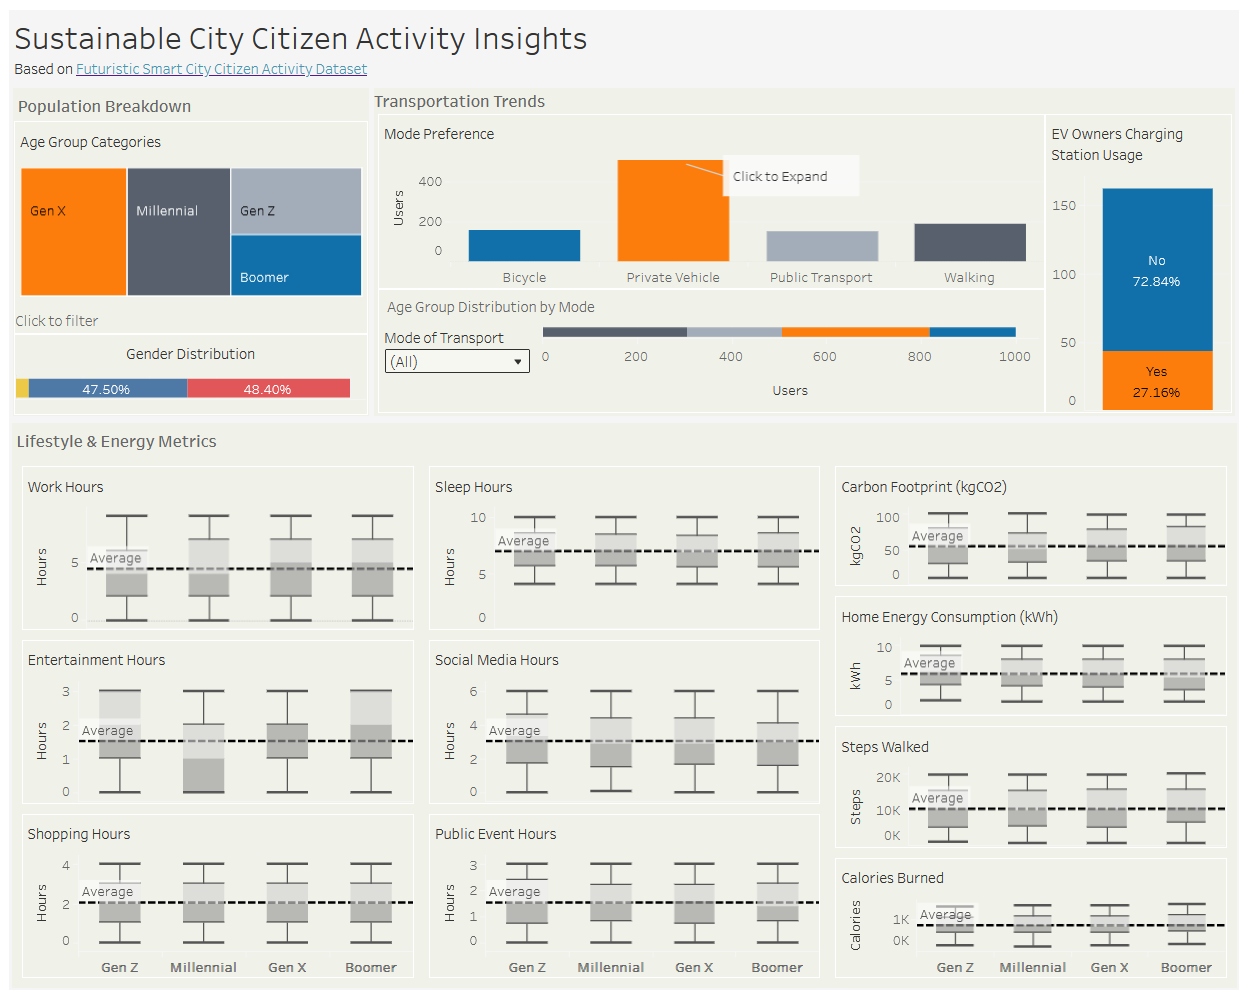

## Recomendations

&nbsp;&nbsp;&nbsp; After going through each of the city's data, the following recommendations are deduced:
* Gen X and Millennials have the largest presence in the city at 31% and 30.6% respectively, thus businesses catering to these age group have potential to succeed in this city.
* Public transport sector must be improved to encourage private vehicle owners to utilize these services either by increasing service area, improving reliability, adding routes, or a combination of these factors.
* Review urban planning to reduce the need for private vehicles and promote walking and cycling as primary means of transportation.
* Investigate the high number of non-working millennials.
* Explore the reason why millennials have low amount of time spent on entertainment.
* Research why 72.8% of EV owners are not utilizing charging stations.